In [1]:
%load_ext autoreload
%autoreload
from IPython.core.debugger import Tracer

from keras.layers import Input, Add, Conv2D
import numpy as np
from keras.models import Model
from keras.optimizers import Adam
from fabrics import UpSample, DownSample, SameRes, Fabric, Node
from keras import backend as K
from keras.utils import plot_model

from helpers import plot_model_history
from IPython.display import clear_output
import matplotlib.pyplot as plt

%matplotlib inline

Using TensorFlow backend.


In [2]:
x = np.load('data/parts_train.npy')
y = np.load('data/parts_train_labels.npy')

x_val = np.load('data/parts_validation.npy')
y_val = np.load('data/parts_validation_labels.npy')

fabric = Fabric(x.shape[1:], (2, 9), 4, channels_double=False)

print("Plotting model")
plot_model(fabric.model, to_file='images/2x9.png')
print("-"*30)

Plotting model
------------------------------


In [3]:
print('-'*30)
print('Fitting model...')
print('-'*30)
history = fabric.model.fit(x, 
                           y, 
                           validation_data=(x_val, y_val), 
                           batch_size=100, 
                           epochs=60, 
                           verbose=1, 
                           shuffle=True)


------------------------------
Fitting model...
------------------------------
Train on 1500 samples, validate on 500 samples
Epoch 1/60
1500/1500 [==============================] - 19s - loss: 1.5993 - acc: 0.4086 - val_loss: 1.0731 - val_acc: 0.6718
Epoch 2/60
1500/1500 [==============================] - 15s - loss: 1.5945 - acc: 0.4104 - val_loss: 1.0503 - val_acc: 0.6774
Epoch 3/60
1500/1500 [==============================] - 15s - loss: 1.5891 - acc: 0.4121 - val_loss: 1.0314 - val_acc: 0.6790
Epoch 4/60
1500/1500 [==============================] - 15s - loss: 1.5831 - acc: 0.4143 - val_loss: 1.0156 - val_acc: 0.6791
Epoch 5/60
1500/1500 [==============================] - 15s - loss: 1.5773 - acc: 0.4162 - val_loss: 1.0025 - val_acc: 0.6789
Epoch 6/60
1500/1500 [==============================] - 15s - loss: 1.5717 - acc: 0.4175 - val_loss: 0.9919 - val_acc: 0.6783
Epoch 7/60
1500/1500 [==============================] - 15s - loss: 1.5662 - acc: 0.4198 - val_loss: 0.9836 - val_acc:

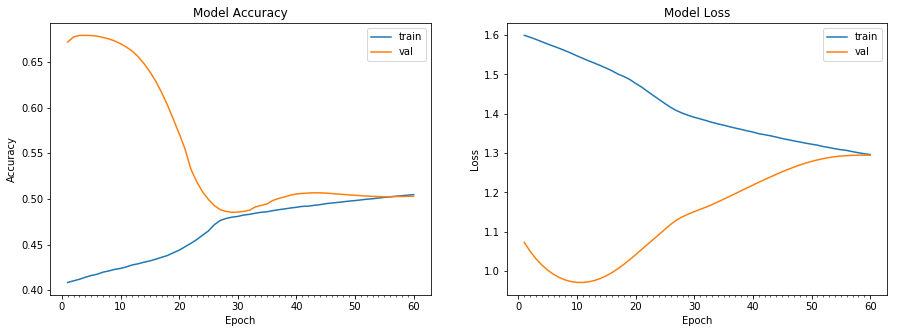

In [4]:
plot_model_history(history)

In [5]:
fabric.model.save('trained_models/2x9.h5')